Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cf_c_18 (CfC)                (None, None, 1)           320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
1/1 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.7216
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.0097 - accuracy: 0.7216
Epoch 3/15
1/1 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.7216
Epoch 4/15
1/1 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.7216
Epoch 5/15
1/1 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.7216
Epoch 6/15
1/1 [==============================] - 0s 3ms/step - loss: 0.0078 - accuracy: 0.7216
Epoch 7/15
1/1 [==============================] - 0s 4ms/step - loss: 0.0

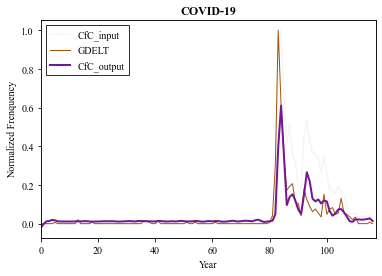

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cf_c_19 (CfC)                (None, None, 1)           320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
1/1 [==============================] - 0s 2ms/step - loss: 0.0564 - accuracy: 0.8557
Epoch 2/15
1/1 [==============================] - 0s 2ms/step - loss: 0.0424 - accuracy: 0.8557
Epoch 3/15
1/1 [==============================] - 0s 3ms/step - loss: 0.0382 - accuracy: 0.8557
Epoch 4/15
1/1 [==============================] - 0s 2ms/step - loss: 0.0351 - accuracy: 0.8557
Epoch 5/15
1/1 [==============================] - 0s 2ms/step - loss: 0.0314 - accuracy: 0.8557
Epoch 6/15
1/1 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 0.8557
Epoch 7/15
1/1 [==============================] - 0s 3ms/step - loss: 0.0

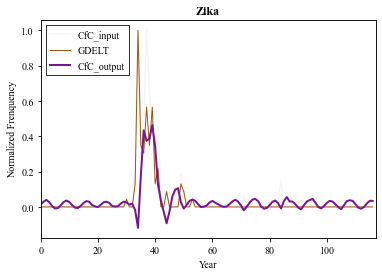

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cf_c_20 (CfC)                (None, None, 1)           320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
1/1 [==============================] - 0s 6ms/step - loss: 0.0254 - accuracy: 0.9278
Epoch 2/15
1/1 [==============================] - 0s 4ms/step - loss: 0.0230 - accuracy: 0.9278
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.0218 - accuracy: 0.9278
Epoch 4/15
1/1 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 0.9278
Epoch 5/15
1/1 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 0.9278
Epoch 6/15
1/1 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9278
Epoch 7/15
1/1 [==============================] - 0s 3ms/step - loss: 0.0

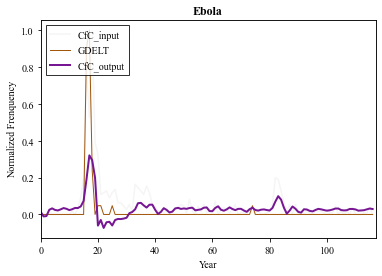

         term  real   predict
0    COVID-19   0.0 -0.022104
1    COVID-19   0.0 -0.002220
2    COVID-19   0.0  0.011754
3    COVID-19   0.0  0.013573
4    COVID-19   0.0  0.019274
..        ...   ...       ...
346     Ebola   0.0  0.021875
347     Ebola   0.0  0.023197
348     Ebola   0.0  0.027914
349     Ebola   0.0  0.032333
350     Ebola   0.0  0.029420

[351 rows x 3 columns]


In [7]:
import numpy as np
np.random.seed(6)
import tensorflow as tf
tf.random.set_seed(6)
from tensorflow import keras
from ncps import wirings
from ncps.tf import CfC
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


def CfC_train(data_x, data_y, input_num):
    # 创建一个由 8个全连接神经元组成的LTC/CfC网络，这些神经元接收1个输入特征的时间序列作为输入。此外，我们定义8个神经元中的1个作为输出
    fc_wiring = wirings.FullyConnected(8, 1)
    model = keras.models.Sequential(
        [
            keras.layers.InputLayer(input_shape=(None, input_num)),  # 输入的特征值个数
            CfC(fc_wiring, return_sequences=True),
        ]
    )
    model.compile(
        optimizer=keras.optimizers.Adam(0.01), loss=keras.losses.mean_squared_error, metrics = ['accuracy']
    )
    model.summary()

    # 训练
    hist = model.fit(x=data_x, y=data_y, batch_size=1, epochs=15, verbose=1,shuffle=False)
    # print(data_x)
    # print(data_y)

    # 训练loss值可视化
    # sns.set()
    # plt.figure(figsize=(6, 4))
    # plt.plot(hist.history["loss"], label="Training loss")
    # plt.legend(loc="upper right")
    # plt.xlabel("Training steps")
    # plt.show()

    return model


def model_prediction(time,sheet_name):
    df = pd.read_excel("E:\\BaiduNetdiskDownload\\data-deco0328.xlsx", sheet_name=sheet_name)
    # 训练数据集
    # term
    data_y = np.array([df.iloc[row,1] for row in df.index][0:time]).reshape([1, time, 1]).astype(np.float32)
    # person
    data_x = np.stack(
        [
            np.array([df.iloc[row,2] for row in df.index][0:time]),
        ],axis=1
    )
    data_x = np.expand_dims(data_x, axis=0).astype(np.float32)
    # 测试数据集
    # term
    data_y_pre = np.array([df.iloc[row,1] for row in df.index]).reshape([1, df.shape[0], 1]).astype(np.float32)
    # person
    data_x_pre = np.stack(
        [
            np.array([df.iloc[row,2] for row in df.index]),
        ],axis=1
    )
    data_x_pre = np.expand_dims(data_x_pre, axis=0).astype(np.float32)
    # 模型训练
    model = CfC_train(data_y, data_x, 1)
    prediction = model(data_y_pre).numpy() # person
    draw(data_x_pre,prediction,data_y_pre,sheet_name,time,df)
    return data_x_pre[0, :, 0],prediction[0, :, 0]


def draw(real,prediction,input,sheet_name,time,df):
    # prediction = np.append(np.linspace(0,prediction[0, :, 0][245],245),prediction[0, :, 0][245:])
    fig = plt.figure(figsize=(6, 4))
    plt.rcParams['font.family'] = 'Times New Roman'
    ax = fig.add_subplot(111)
    ax.grid(False)
    ax.plot(input[0, :, 0], label="CfC_input",color='#f5f5f5')
    ax.plot(real[0, :, 0], label="GDELT", linewidth=1,color='#a1560b')
    ax.plot(prediction[0, :, 0], label="CfC_output", linewidth=2,color='#771693')
    ax.legend(loc="upper left"
              , fancybox=False
              , edgecolor='black'
              )
    ax.spines['top'].set_linewidth(0.9)
    ax.spines['left'].set_linewidth(0.9)
    ax.spines['right'].set_linewidth(0.9)
    ax.spines['bottom'].set_linewidth(0.9)
    ax.set_xlim(0, df.shape[0])
    ax.set_xlabel('Year')
    ax.set_ylabel('Normalized Frenquency')
    ymin,ymax = ax.get_ylim()
    #ax.vlines(time, ymin, ymax, 'black', '--',linewidth=0.6) # 垂直
    ax.set_ylim(ymin,ymax)
    ax.set_title(sheet_name, weight = 'bold')
    plt.savefig(sheet_name+'CfC_300dpi.jpg', bbox_inches='tight', dpi=300)
    plt.show()


lists = ["COVID-19","Zika","Ebola"]
times = [97,97,97] # 标记训练数据长度

real_data = [] # 真实数据
predict_data = [] # 预测数据
list_data = [] # 需要预测的term
for list,time in zip(lists,times):
    real,predict = model_prediction(time, list)
    real_data += real.tolist()
    predict_data += predict.tolist()
    list_data += [list for i in range(len(real.tolist()))][:]

data=pd.DataFrame({'term':list_data,'real':real_data,'predict':predict_data})
print(data)
data.to_excel('CfC.xlsx') # 保存预测结果